In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)



In [141]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [104]:
df = pd.read_excel("Superstore.xls")
df.head()

no       order _id Order Date  Ship Date       Ship Mode Customer ID  \
0  NaN             NaN 2016-11-08 2016-11-11    Second Class    CG-12520   
1  2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [90]:
fig = px.bar(df,y="Category",color="Region")
fig.update_traces(marker_line_width = 0)
fig.show()

In [ ]:
# # To show Region sales

# px.histogram(df,x="Region",y="Sales",color="Region")

In [19]:
region_wise_df = df.groupby(["Region"]).size().rename("count")
region_wise_df

Region
Central    2323
East       2848
South      1620
West       3203
Name: count, dtype: int64

In [20]:
region_wise_df = df.groupby(["Region"]).size().rename("count").reset_index()
region_wise_df

Region  count
0  Central   2323
1     East   2848
2    South   1620
3     West   3203

In [22]:
## Regionwise count

px.bar(region_wise_df, x="Region",y="count",color = "Region",text="count")

In [79]:
## Calculate Regionwise Profit


df.groupby("Region")["Profit"].sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [26]:
px.histogram(df,x="Region",y="Profit",color="Region")

In [50]:
fig = px.bar(df,x = "Region",y="Category",color="Region",title="Regionwise different categories")
fig.update_traces(marker_line_width = 0)
fig.show()

In [78]:
df.columns = df.columns.str.replace(" ", "_")
df.head(2)

no       order__id Order_Date  Ship_Date     Ship_Mode Customer_ID  \
0  NaN             NaN 2016-11-08 2016-11-11  Second Class    CG-12520   
1  2.0  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer_Name   Segment        Country       City  ... Postal_Code  Region  \
0   Claire Gute  Consumer  United States  Henderson  ...       42420   South   
1   Claire Gute  Consumer  United States  Henderson  ...       42420   South   

        Product_ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product_Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  

[2 rows x 21 columns]

In [77]:
### Calculate month wise profit

avg_profit = df.groupby([df["Order_Date"].dt.month])["Profit"].mean()
avg_profit

Order_Date
1     23.974924
2     34.315369
3     41.084321
4     17.346462
5     30.491575
6     29.687302
7     19.482626
8     30.845522
9     26.650380
10    38.808353
11    24.111779
12    30.801983
Name: Profit, dtype: float64

In [66]:
px.bar(avg_profit,x="Profit",color = "Profit")

In [85]:
### calculate average profit based on sub-category

fig = px.histogram(df,x="Sub-Category",y = "Profit", histfunc="avg",color = "Sub-Category")   # histfunc =avg of y-axis
fig.show()

In [95]:
df.groupby("City")["Sales"].sum()

City
Aberdeen         25.500
Abilene           1.392
Akron          2729.986
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Sales, Length: 531, dtype: float64

In [100]:
import plotly.express as px

fig = px.bar(df, x='Category', y='Sales', title='Sales by Category',color="Category")
fig.update_traces(marker_line_width = 0)
fig.show()



In [113]:
### Monthly sales over the time

fig = px.histogram(df, x='Order Date', y='Sales', title='Sales Over Time')
fig.show()

In [128]:
## Sales distribution by category

fig = px.pie(df, names='Category', values='Sales', title='Sales Distribution by Category')
fig.show()

In [117]:
### sales vs profit

fig = px.scatter(df, x='Sales', y='Profit', title='Sales vs Profit',trendline="ols")
fig.show()



Text(0, 0.5, 'Sales')

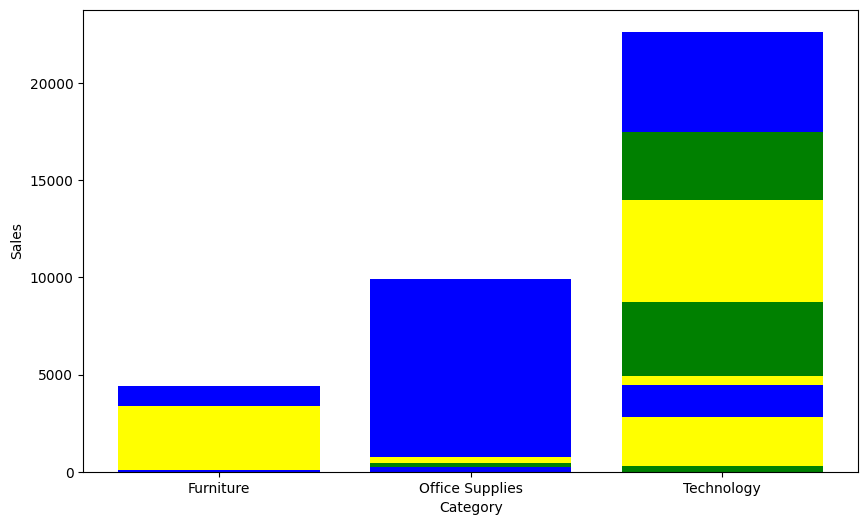

In [97]:
# Bar chart for Sales by Category
plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Sales'], color=['blue', 'green', 'yellow'])
plt.xlabel('Category')
plt.ylabel('Sales')

Text(0, 0.5, 'Profit')

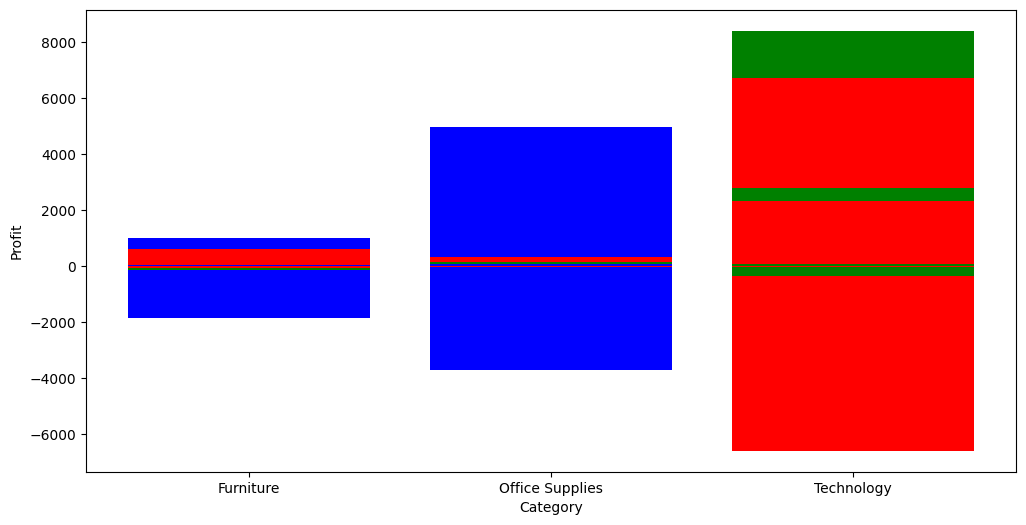

In [102]:
# Bar chart for Sales by Category
plt.figure(figsize=(12, 6))
plt.bar(df['Category'], df['Profit'], color=['blue', 'green', 'red'])
plt.xlabel('Category')
plt.ylabel('Profit')

In [105]:
# used groupy on region and state column to calculate avg sales


reg_state_avg_sales_df = df.groupby(["Region","State"])["Sales"].mean()
reg_state_avg_sales_df

Region   State               
Central  Illinois                 162.939230
         Indiana                  359.431946
         Iowa                     152.658667
         Kansas                   121.429583
         Michigan                 299.096525
         Minnesota                335.541011
         Missouri                 336.441667
         Nebraska                 196.445526
         North Dakota             131.415714
         Oklahoma                 298.233182
         South Dakota             109.630000
         Texas                    172.779742
         Wisconsin                291.951000
East     Connecticut              163.223866
         Delaware                 285.948635
         District of Columbia     286.502000
         Maine                    158.816250
         Maryland                 225.766886
         Massachusetts            212.106919
         New Hampshire            270.093481
         New Jersey               275.110092
         New York        

In [106]:
reg_state_avg_sales_df[df["Region"]].East

State
Connecticut             163.223866
Delaware                285.948635
District of Columbia    286.502000
Maine                   158.816250
Maryland                225.766886
Massachusetts           212.106919
New Hampshire           270.093481
New Jersey              275.110092
New York                275.599531
Ohio                    166.861697
Pennsylvania            198.487077
Rhode Island            404.070643
Vermont                 811.760909
West Virginia           302.456000
Connecticut             163.223866
Delaware                285.948635
District of Columbia    286.502000
Maine                   158.816250
Maryland                225.766886
Massachusetts           212.106919
New Hampshire           270.093481
New Jersey              275.110092
New York                275.599531
Ohio                    166.861697
Pennsylvania            198.487077
Rhode Island            404.070643
Vermont                 811.760909
West Virginia           302.456000
Connecticut   

Text(0, 0.5, 'Sales')

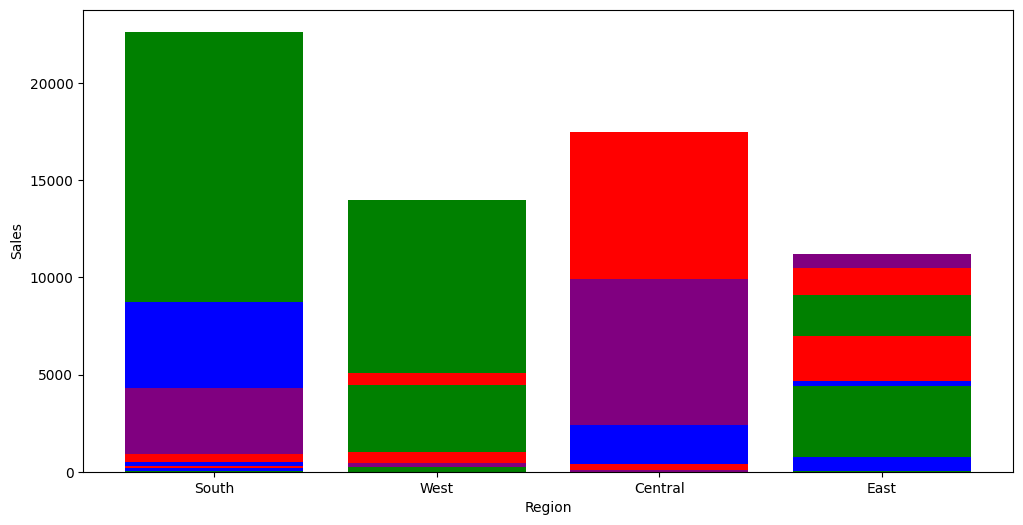

In [125]:
# Bar chart for Sales by Category
plt.figure(figsize=(12, 6))
plt.bar(df['Region'], df['Sales'], color=['blue', 'green', 'red','purple'])
plt.xlabel('Region')
plt.ylabel('Sales')

In [131]:
df["loss_df"] = df["Sales"] - df["Profit"]
df.head()

no       order _id Order Date  Ship Date       Ship Mode Customer ID  \
0  NaN             NaN 2016-11-08 2016-11-11    Second Class    CG-12520   
1  2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit    loss_df  
0      0.00   41.9136   220.0464  
1      0.00  219.5820   512.3580  
2      0.00    6.8714     7.7486  
3      0.45 -383.0310  1340.6085  
4      0.20    2.5164    19.8516

Text(0, 0.5, 'Region')

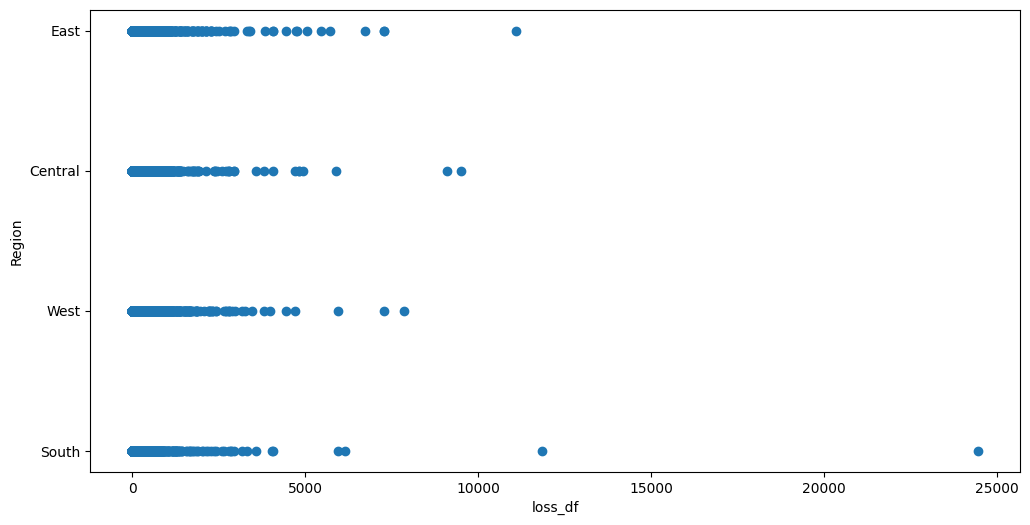

In [137]:
# Bar chart for region wise loss
plt.figure(figsize=(12, 6))
plt.scatter(df['loss_df'], df['Region'])
plt.xlabel('loss_df')
plt.ylabel('Region')